In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
omdb = pd.read_json('movies/data/omdb-data.json.gz', lines=True)

In [3]:
wiki = pd.read_json('movies/data/wikidata-movies2.json.gz', lines=True)

In [4]:
wiki_omdb = wiki.merge(omdb, on=['imdb_id'])

In [5]:
wiki_omdb = wiki_omdb[['omdb_genres', 'nbox', 'publication_date']]

In [6]:
genres = wiki_omdb['omdb_genres'].str.join('|').str.get_dummies()
genres.reset_index(drop=True, inplace=True)
wiki_omdb = pd.concat([wiki_omdb, genres], axis=1).dropna()

In [7]:
# idx = wiki_omdb.groupby(['publication_date'], sort=True)['nbox'].transform(max) == wiki_omdb['nbox']
# wiki_omdb = wiki_omdb[idx]
# wiki_omdb = wiki_omdb.sort_values(by=['publication_date'])


In [8]:
# wiki_omdb = wiki_omdb.drop(['omdb_genres'], axis=1)
# wiki_omdb

In [9]:
# wiki_omdb.plot.bar()
# plt.show()

In [10]:
# wiki_omdb[wiki_omdb['publication_date'] == '1958-01-01']

In [11]:
# list duplicate dates
# wiki_omdb[wiki_omdb['publication_date'].isin(wiki_omdb['publication_date'][wiki_omdb['publication_date'].duplicated()])].sort_values(by=['publication_date'])

In [12]:
wiki_omdb = wiki_omdb.groupby(['publication_date'], sort=True).sum().reset_index()
# del wiki_omdb['omdb_genres']
del wiki_omdb['nbox']


In [13]:
wiki_omdb['publication_date'] = pd.to_datetime(wiki_omdb['publication_date'])
type(wiki_omdb['publication_date'].values[0])

numpy.datetime64

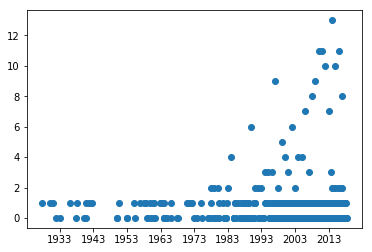

In [14]:
plt.plot_date(wiki_omdb['publication_date'], wiki_omdb['Drama'])
plt.show()